# Vector Applications - Vector in data analysis

Methods to evaluate the similarity between two variables
1. Correlation
2. Cosine similarity

These metrics reflect the linear relationship between two variables :
They are based on inner products, and inner product s a linear operation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# NOTE: these lines define global figure properties used for publication.
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # print figures in svg format
plt.rcParams.update({'font.size':14}) # set global font size
     

### Exercise 1

In [4]:
# the function

def corrAndCosine(x,y):

    # compute cosine similarity
    num = np.dot(x, y) #numerator
    den = np.linalg.norm(x) * np.linalg.norm(y)
    cos = num / den

    # compute correlation (similar to above but mean-centered!)
    xm = x-np.mean(x)
    ym = y-np.mean(y)
    num = np.dot(xm, ym) #numerator
    den = np.linalg.norm(xm) * np.linalg.norm(ym)
    cor = num / den

    return cor, cos

# test it
a = np.random.randn(15)
b = np.random.randn(15)

# compute the correlation and cosine
r,c = corrAndCosine(a,b)
r,c

print(r, np.corrcoef(a,b)[0,1])

0.10773334723642594 0.10773334723642591


In [ ]:
# compare r and c without mean-centering
a = np.random.randn(15) + 10 # note the offset!
b = np.random.randn(15)

# mean-center
aNoMean = a - np.mean(a)
bNoMean = b - np.mean(b)

# show the results with and without mean-centering
print('Without mean-centering (should differ):') # Cosine 두 벡터가 얼마나 같은 방향을 보는지..
print( np.round(corrAndCosine(a,b),4) )
print(' ')

print('With mean-centering (should be the same):') # Pearson 데이터의 상대적 변화 패턴만 보는 척도
print( np.round(corrAndCosine(aNoMean,bNoMean),4) )

Without mean-centering (should differ):
[ 0.223  -0.0262]
 
With mean-centering (should be the same):
[0.223 0.223]


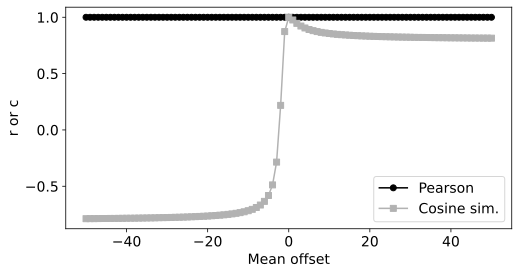

In [ ]:
# create the variables
a = np.arange(4,dtype=float)
offsets = np.arange(-50,51) #mean shifts

# initialize the results
results = np.zeros((len(offsets)), 2)

# run the simulation!
for i in range(len(offsets)):
    results[i,:] = corrAndCosine(a, a+offsets[i])


# plot the results!
plt.figure(figsize=(8,4))
h = plt.plot(offsets,results)
h[0].set_color('k')
h[0].set_marker('o')
h[1].set_color([.7,.7,.7])
h[1].set_marker('s')

plt.xlabel('Mean offset')
plt.ylabel('r or c')
plt.legend(['Pearson','Cosine sim.'])
#plt.savefig('Figure_03_02.png',dpi=300)
plt.show()

# Pearson correlation is robust to mean shifts, whereas Cosine simliarity is sensitive to them.

### Exercise 3

In [ ]:
# import the function
from scipy.stats import pearsonr

a = np.random.randn(15) + 10  # offset
b = np.random.randn(15)

r, c = corrAndCosine(a, b)
print("Pearson r:", r)
print("Cosine similarity:", c) ## ..?

Pearson r: 0.1615912657602711
Cosine similarity: -0.05440827625953332


### Exercise 4

In [ ]:
# a bare-bones correlation function
def rho(x,y):
  xm = x-np.mean(x)
  ym = y-np.mean(y)
  n  = np.dot(xm,ym)
  d  = np.linalg.norm(xm) * np.linalg.norm(ym)
  return n/d


# import the time library
import time

# experiment parameters
numIters  = 1000
varLength =  500

# clock my custom-written function
tic = time.time()
for i in range(numIters):
  x = np.random.randn(varLength, 2)
  rho(x[:,0],x[:,1])
t1 = time.time() - tic


# now for numpy's corrcoef function
tic = time.time()
for i in range(numIters):
  x = np.random.randn(varLength, 2)
  pearsonr(x[:,0],x[:,1])
t2 = time.time() - tic


# print the results!
# Note: time() returns seconds, so I multiply by 1000 for ms
print(f'My function took {t1*1000:.2f} ms')
print(f'   pearsonr took {t2*1000:.2f} ms')
     

My function took 52.53 ms
   pearsonr took 272.00 ms
